# 🚀 Introduction

In this notebook, we will focus on the static information about patients: their age, gender, ethnicity, admission related info, and more. These fundamental characteristics offer a foundation to understand the diverse patient population represented in the MIMIC dataset. By exploring these features, we hope to gain insights into the distribution and characteristics of patients in intensive care, setting the stage for deeper analyses and predictive modeling tasks.

Our objectives in this EDA are:

1. To understand the distribution of key patient attributes like age, gender, and ethnicity.
2. To identify any potential patterns or anomalies that might exist in the dataset.
3. To set the groundwork for future analyses, ensuring we have a comprehensive understanding of our foundational data.

Let's dive into the data and begin our exploration!

# 🛠️ Setup & Preliminary Actions

In [1]:
# Import Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

import os
# import wandb
import warnings

from config import *
from src.data.process_patients import *
from utils.safe_display import blind_display

In [2]:
# Configuration & Settings:

# For better visualization
warnings.filterwarnings('ignore')
os.environ['WANDB_SILENT'] = 'true'
sns.set_theme(style="whitegrid")

# # Login and initialize a new wandb run
# wandb_key = os.environ.get("WANDB_API_KEY")
# ! wandb login $wandb_key
#
# run = wandb.init(
#     project='FuzzyMedNet',
#     name='patient_eda',
#     job_type='eda'
# )

In [3]:
# Safety flag - when set to True will not display sensitive data
BLINDED = False

# 📂 Data Loading

In [4]:
# Open the file in read mode
with h5py.File(DATA_FILE_PATH, 'r') as file:
    # Print the keys at the root of the file
    print(list(file.keys()))

['codes', 'interventions', 'patients', 'vitals_labs', 'vitals_labs_mean']


In [5]:
patients = pd.read_hdf(DATA_FILE_PATH, 'patients')
vitals_labs = pd.read_hdf(DATA_FILE_PATH, 'vitals_labs')
vitals_labs_mean = pd.read_hdf(DATA_FILE_PATH, 'vitals_labs_mean')
interventions = pd.read_hdf(DATA_FILE_PATH, 'interventions')
codes = pd.read_hdf(DATA_FILE_PATH, 'codes')

In [6]:
blind_display(patients, vitals_labs, vitals_labs_mean, interventions, codes, blinded=BLINDED)

patients.shape:  (34472, 28)


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,
3,145834,211552,M,WHITE,76.526792,Medicare,2101-10-20 19:08:00,HYPOTENSION,2101-10-31 13:58:00,SNF,1.0,0.0,...,2101-10-26 20:43:09,6.064560,EMERGENCY,MICU,0,0,0,1,0,145
4,185777,294638,F,WHITE,47.845047,Private,2191-03-16 00:28:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",2191-03-23 18:41:00,HOME WITH HOME IV PROVIDR,1.0,0.0,...,2191-03-17 16:46:31,1.678472,EMERGENCY,MICU,0,0,0,1,0,40
6,107064,228232,F,WHITE,65.942297,Medicare,2175-05-30 07:15:00,CHRONIC RENAL FAILURE/SDA,2175-06-15 16:00:00,HOME HEALTH CARE,1.0,0.0,...,2175-06-03 13:39:54,3.672917,ELECTIVE,SICU,0,0,0,1,0,88
9,150750,220597,M,UNKNOWN/NOT SPECIFIED,41.790228,Medicaid,2149-11-09 13:06:00,HEMORRHAGIC CVA,2149-11-14 10:15:00,DEAD/EXPIRED,1.0,0.0,...,2149-11-14 20:52:14,5.323056,EMERGENCY,MICU,1,1,1,1,0,127
11,194540,229441,F,WHITE,50.148295,Private,2178-04-16 06:18:00,BRAIN MASS,2178-05-11 19:00:00,HOME HEALTH CARE,1.0,0.0,...,2178-04-17 20:21:05,1.584410,EMERGENCY,SICU,0,0,0,1,0,38


vitals_labs.shape:  (2200954, 312)


LEVEL2                                 alanine aminotransferase             \
Aggregation Function                                      count  mean  std   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                             2.0  25.0  0.0   
                              1                             0.0   NaN  NaN   
                              2                             0.0   NaN  NaN   
                              3                             0.0   NaN  NaN   
                              4                             0.0   NaN  NaN   

LEVEL2                                 albumin           albumin ascites       \
Aggregation Function                     count mean  std           count mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0  1.8  0.0             0.0  NaN   
                              1            0.0  NaN  NaN             0.0  NaN   
                              2            0.0  NaN  NaN             0.0  NaN   
                              3            0.0  NaN  NaN             0.0  NaN   
                              4            0.0  NaN  NaN             0.0  NaN   

LEVEL2                                     albumin pleural  ...  \
Aggregation Function                   std           count  ...   
subject_id hadm_id icustay_id hours_in                      ...   
3          145834  211552     0        NaN             0.0  ...   
                              1        NaN             0.0  ...   
                              2        NaN             0.0  ...   
                              3        NaN             0.0  ...   
                              4        NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   

LEVEL2                                 white blood cell count urine           \
Aggregation Function                                          count mean std   
subject_id hadm_id icustay_id hours_in                                         
3          145834  211552     0                                 0.0  NaN NaN   
                              1                                 0.0  NaN NaN   
                              2                                 0.0  NaN NaN   
                              3                                 0.0  NaN NaN   
                              4                                 0.0  NaN NaN   

LEVEL2                                    ph                 ph urine           
Aggregation Function                   count  mean       std    count mean std  
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0          9.0  7.40  0.147733      1.0  5.0 NaN  
                              1          0.0   NaN       NaN      0.0  NaN NaN  
                              2          3.0  7.26  0.000000      0.0  NaN NaN  
                              3          0.0   NaN       NaN      0.0  NaN NaN  
                              4          0.0   NaN       NaN      0.0  NaN NaN  

[5 rows x 312 columns]

vitals_labs_mean.shape:  (2200954, 104)


LEVEL2                                 alanine aminotransferase albumin  \
Aggregation Function                                       mean    mean   
subject_id hadm_id icustay_id hours_in                                    
3          145834  211552     0                            25.0     1.8   
                              1                             NaN     NaN   
                              2                             NaN     NaN   
                              3                             NaN     NaN   
                              4                             NaN     NaN   

LEVEL2                                 albumin ascites albumin pleural  \
Aggregation Function                              mean            mean   
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0                    NaN             NaN   
                              1                    NaN             NaN   
                              2                    NaN             NaN   
                              3                    NaN             NaN   
                              4                    NaN             NaN   

LEVEL2                                 albumin urine alkaline phosphate  \
Aggregation Function                            mean               mean   
subject_id hadm_id icustay_id hours_in                                    
3          145834  211552     0                  NaN               73.0   
                              1                  NaN                NaN   
                              2                  NaN                NaN   
                              3                  NaN                NaN   
                              4                  NaN                NaN   

LEVEL2                                  anion gap asparate aminotransferase  \
Aggregation Function                         mean                      mean   
subject_id hadm_id icustay_id hours_in                                        
3          145834  211552     0         20.666667                      69.0   
                              1               NaN                       NaN   
                              2               NaN                       NaN   
                              3               NaN                       NaN   
                              4               NaN                       NaN   

LEVEL2                                 basophils bicarbonate  ...  \
Aggregation Function                        mean        mean  ...   
subject_id hadm_id icustay_id hours_in                        ...   
3          145834  211552     0              NaN   16.333333  ...   
                              1              NaN         NaN  ...   
                              2              NaN         NaN  ...   
                              3              NaN         NaN  ...   
                              4              NaN         NaN  ...   

LEVEL2                                 total protein total protein urine  \
Aggregation Function                            mean                mean   
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0                  NaN                 NaN   
                              1                  NaN                 NaN   
                              2                  NaN                 NaN   
                              3                  NaN                 NaN   
                              4                  NaN                 NaN   

LEVEL2                                 troponin-i troponin-t venous pvo2  \
Aggregation Function                         mean       mean        mean   
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0               NaN        NaN         NaN   
                              1               NaN        NaN         NaN   
                              

interventions.shape:  (2200954, 14)


vent  vaso  adenosine  dobutamine  \
subject_id hadm_id icustay_id hours_in                                      
3          145834  211552     0            1     0          0           0   
                              1            1     1          0           0   
                              2            1     1          0           0   
                              3            1     1          0           0   
                              4            1     1          0           0   

                                        dopamine  epinephrine  isuprel  \
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0                0            0        0   
                              1                1            0        0   
                              2                1            0        0   
                              3                0            0        0   
                              4                0            0        0   

                                        milrinone  norepinephrine  \
subject_id hadm_id icustay_id hours_in                              
3          145834  211552     0                 0               0   
                              1                 0               0   
                              2                 0               0   
                              3                 0               0   
                              4                 0               1   

                                        phenylephrine  vasopressin  \
subject_id hadm_id icustay_id hours_in                               
3          145834  211552     0                     0            0   
                              1                     1            0   
                              2                     1            0   
                              3                     1            0   
                              4                     1            0   

                                        colloid_bolus  crystalloid_bolus  \
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0                     0                  0   
                              1                     0                  0   
                              2                     0                  0   
                              3                     0                  0   
                              4                     0                  0   

                                        nivdurations  
subject_id hadm_id icustay_id hours_in                
3          145834  211552     0                    0  
                              1                    0  
                              2                    0  
                              3                    0  
                              4                    0

codes.shape:  (2200954, 1)


icd9_codes
subject_id hadm_id icustay_id hours_in                                                   
3          145834  211552     0         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              1         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              2         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              3         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              4         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...

# 🕵️‍♂️ Data Overview

## Demographics

In [7]:
# Check for any initial issues in the dataset that need immediate addressing, such as missing values or incorrect datatypes.
print(patients.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 34472 entries, (3, 145834, 211552) to (99999, 113369, 246512)
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  34472 non-null  category      
 1   ethnicity               34472 non-null  category      
 2   age                     34472 non-null  float64       
 3   insurance               34472 non-null  object        
 4   admittime               34472 non-null  datetime64[ns]
 5   diagnosis_at_admission  34471 non-null  object        
 6   dischtime               34472 non-null  datetime64[ns]
 7   discharge_location      34472 non-null  object        
 8   fullcode_first          28162 non-null  float64       
 9   dnr_first               28162 non-null  float64       
 10  fullcode                28162 non-null  float64       
 11  dnr                     28162 non-null  float64       
 12  dnr_first_

In [8]:
print('Missing values:')
patients.isna().sum()

Missing values:


gender                        0
ethnicity                     0
age                           0
insurance                     0
admittime                     0
diagnosis_at_admission        1
dischtime                     0
discharge_location            0
fullcode_first             6310
dnr_first                  6310
fullcode                   6310
dnr                        6310
dnr_first_charttime       31353
cmo_first                  6310
cmo_last                   6310
cmo                        6310
deathtime                 31122
intime                        0
outtime                       0
los_icu                       0
admission_type                0
first_careunit                0
mort_icu                      0
mort_hosp                     0
hospital_expire_flag          0
hospstay_seq                  0
readmission_30                0
max_hours                     0
dtype: int64

In [9]:
# Statistical Summary:
patients.describe()

,age,fullcode_first,dnr_first,fullcode,dnr,cmo_first,cmo_last,cmo,los_icu,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours
count,34472.000000,28162.000000,28162.000000,28162.000000,28162.000000,28162.000000,28162.000000,28162.000000,34472.000000,34472.000000,34472.000000,34472.000000,34472.0,34472.000000,34472.000000
mean,75.029209,0.936297,0.058270,0.939955,0.110752,0.003054,0.032526,0.034017,2.639321,0.065589,0.095846,0.097180,1.0,0.043223,62.847586
std,55.853725,0.244227,0.234257,0.237575,0.313830,0.055177,0.177396,0.181277,1.982919,0.247567,0.294384,0.296207,0.0,0.203363,47.591847
min,15.052693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.0,0.000000,12.000000
25%,52.466861,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.167674,0.000000,0.000000,0.000000,1.0,0.000000,28.000000
50%,65.741463,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.981950,0.000000,0.000000,0.000000,1.0,0.000000,47.000000
75%,78.016920,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.310964,0.000000,0.000000,0.000000,1.0,0.000000,79.000000
max,310.280861,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.999456,1.000000,1.000000,1.000000,1.0,1.000000,239.000000


# 🚧 Data Preprocessing

- Handling missing values.
- Feature engineering.

In [10]:
# check gender categories
patients['gender'].value_counts(dropna=False)

M    19494
F    14978
Name: gender, dtype: int64

In [11]:
# check ethnicity categories
patients['ethnicity'].value_counts(dropna=False)

WHITE                                                       24429
UNKNOWN/NOT SPECIFIED                                        3221
BLACK/AFRICAN AMERICAN                                       2456
HISPANIC OR LATINO                                            881
OTHER                                                         785
UNABLE TO OBTAIN                                              652
ASIAN                                                         545
PATIENT DECLINED TO ANSWER                                    351
ASIAN - CHINESE                                               166
HISPANIC/LATINO - PUERTO RICAN                                124
BLACK/CAPE VERDEAN                                            122
WHITE - RUSSIAN                                                99
MULTI RACE ETHNICITY                                           77
BLACK/HAITIAN                                                  64
WHITE - OTHER EUROPEAN                                         59
HISPANIC/L

In [12]:
# Regroup similar categories of ethnicities

patients['ethnicity'] = patients['ethnicity'].apply(categorize_ethnicity)
patients['ethnicity'].value_counts(dropna=False)

WHITE              24675
OTHER/UNKNOWN       5086
BLACK               2667
HISPANIC            1137
ASIAN                865
ISLANDER              25
NATIVE AMERICAN       17
Name: ethnicity, dtype: int64

In [13]:
# check all admission types
patients['admission_type'].value_counts(dropna=False)

EMERGENCY    27830
ELECTIVE      5705
URGENT         937
Name: admission_type, dtype: int64

In [14]:
# regroup admission types into: EMERGENCY & ELECTIVE
patients['admission_type'] = patients['admission_type'].apply(group_admission_type)
patients['admission_type'].value_counts(dropna=False)

EMERGENCY    28767
ELECTIVE      5705
Name: admission_type, dtype: int64

In [15]:
binary_columns = ['fullcode', 'fullcode_first', 'dnr', 'dnr_first', 'cmo', 'cmo_first', 'cmo_last']

patients[patients[binary_columns].isnull().any(axis=1)][binary_columns]

,,,fullcode,fullcode_first,dnr,dnr_first,cmo,cmo_first,cmo_last
subject_id,hadm_id,icustay_id,,,,,,,
42,119203,210828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,144073,268016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,100536,233150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,188606,216929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,123552,277421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99913,175989,292375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99955,108494,243255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99965,101083,257338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the context of our dataset, the missing values appear to be not missing at random (MNAR), suggesting that their absence conveys meaningful information.
For instance, a missing `dnr` might indicate that the discussion or decision about "do not resuscitate" was never made for that patient.

Rather than imputing these missing values, which could introduce bias or misrepresent the underlying data, we have chosen to retain them as indicators of specific conditions or scenarios not captured in the dataset.

In [16]:
# Group Ages
patients['age_bucket'] = patients['age'].apply(categorize_age)
patients['age_bucket'].value_counts()

>70      14213
51-70    12938
31-50     5489
<31       1832
Name: age_bucket, dtype: int64

In [17]:
by_ethnicity = patients.reset_index().pivot_table(index='ethnicity',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                           'max_hours':'mean'},
                                                  margins=True)
by_ethnicity = by_ethnicity.sort_values(by=('icustay_id','All'))
by_ethnicity = pd.concat([by_ethnicity], keys=['ethnicity'], names=['item'])

by_insurance = patients.reset_index().pivot_table(index='insurance',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                           'max_hours':'mean'},
                                                  margins=True)
by_insurance = by_insurance.sort_values(by=('icustay_id','All'))
by_insurance = pd.concat([by_insurance], keys=['insurance'], names=['item'])

by_age = patients.reset_index().pivot_table(index='age_bucket',
                                            columns='gender',
                                            values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                            aggfunc={'icustay_id': 'count',
                                                     'mort_icu': 'mean',
                                                     'mort_hosp':'mean',
                                                     'max_hours':'mean'},
                                            margins=True)
by_age = by_age.sort_values(by=('icustay_id','All'))
by_age = pd.concat([by_age], keys=['age'], names=['item'])

by_admission = patients.reset_index().pivot_table(index='admission_type',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                           'max_hours':'mean'},
                                                  margins=True)
by_admission = by_admission.sort_values(by=('icustay_id','All'))
by_admission = pd.concat([by_admission], keys=['admission_type'], names=['item'])

by_unit = patients.reset_index().pivot_table(index='first_careunit',
                                              columns='gender',
                                              values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                              aggfunc={'icustay_id': 'count',
                                                       'mort_icu': 'mean',
                                                       'mort_hosp':'mean',
                                                       'max_hours':'mean'},
                                              margins=True)
by_unit = by_unit.sort_values(by=('icustay_id','All'))
by_unit = pd.concat([by_unit], keys=['first_careunit'], names=['item'])

In [24]:
demographics = pd.concat([by_ethnicity, by_age, by_insurance, by_admission, by_unit],axis=0)
demographics.index.names = ['item','values']
demographics

icustay_id                max_hours             \
gender                                  F      M    All          F          M   
item           values                                                           
ethnicity      NATIVE AMERICAN         10      7     17  77.300000  31.428571   
               ISLANDER                13     12     25  50.461538  54.583333   
               ASIAN                  378    487    865  63.203704  63.492813   
               HISPANIC               448    689   1137  59.399554  59.854862   
               BLACK                 1448   1219   2667  61.247928  60.150123   
               OTHER/UNKNOWN         2019   3067   5086  69.210500  65.592762   
               WHITE                10662  14013  24675  63.200713  61.710554   
               All                  14978  19494  34472  63.706770  62.187442   
age            <31                    748   1084   1832  54.633690  57.380996   
               31-50                 2212   3277   5489  58.920434  58.191028   
               51-70                 4888   8050  12938  63.571399  61.121615   
               >70                   7130   7083  14213  66.236325  65.983340   
               All                  14978  19494  34472  63.706770  62.187442   
insurance      Self Pay               125    352    477  51.832000  54.272727   
               Government             402    648   1050  58.393035  61.504630   
               Medicaid              1186   1596   2782  61.787521  61.651003   
               Private               4415   7431  11846  60.354700  58.865832   
               Medicare              8850   9467  18317  66.045311  65.226154   
               All                  14978  19494  34472  63.706770  62.187442   
admission_type ELECTIVE              2282   3423   5705  58.380368  54.498101   
               EMERGENCY            12696  16071  28767  64.664146  63.825213   
               All                  14978  19494  34472  63.706770  62.187442   
first_careunit TSICU                 1777   2725   4502  61.366348  64.075963   
               CCU                   2185   3008   5193  64.816934  63.652593   
               SICU                  2678   2842   5520  66.326736  65.376144   
               CSRU                  2326   4724   7050  65.334050  57.824090   
               MICU                  6012   6195  12207  62.198436  62.509766   
               All                  14978  19494  34472  63.706770  62.187442   

                                          mort_hosp                      \
gender                                All         F         M       All   
item           values                                                     
ethnicity      NATIVE AMERICAN  58.411765  0.000000  0.000000  0.000000   
               ISLANDER         52.440000  0.153846  0.083333  0.120000   
               ASIAN            63.366474  0.097884  0.094456  0.095954   
               HISPANIC         59.675462  0.064732  0.059507  0.061566   
               BLACK            60.746157  0.069061  0.067268  0.068241   
               OTHER/UNKNOWN    67.028903  0.161961  0.119661  0.136453   
               WHITE            62.354448  0.102420  0.084208  0.092077   
               All              62.847586  0.105955  0.088078  0.095846   
age            <31              56.259279  0.025401  0.042435  0.035480   
               31-50            58.484970  0.057414  0.052487  0.054473   
               51-70            62.047148  0.082242  0.072547  0.076210   
               >70              66.110251  0.145722  0.129183  0.137480   
               All              62.847586  0.105955  0.088078  0.095846   
insurance      Self Pay         53.633124  0.144000  0.107955  0.117400   
               Government       60.313333  0.032338  0.055556  0.046667   
               Medicaid         61.709202  0.075042  0.077694  0.076564   
               Private          59.420733  0.069083  0.060153  0.063481   
               Medi

# 📉 Data Visualization

Visualize different aspects of the data to uncover patterns, relationships, anomalies, etc.

**Univariate Analysis:**

Distribution plots for numerical columns.
Bar plots for categorical columns.

**Bivariate Analysis:**

Scatter plots, joint plots, and pair plots for numerical vs. numerical columns.
Box plots or violin plots for categorical vs. numerical columns.

Correlation Analysis

## Demographics

### Age Distribution

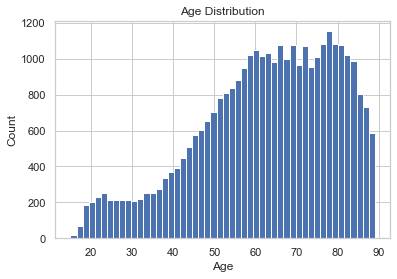

In [19]:
age = patients[patients['age'] < 300]['age']
plt.hist(age, bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

### Age Groups Distribution by Gender

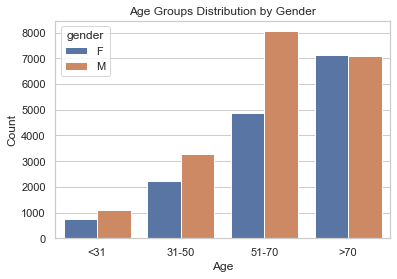

In [31]:
sns.countplot(data=patients, x='age_bucket', hue='gender', order=['<31', '31-50', '51-70', '>70'])
plt.title('Age Groups Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### LOS Distribution

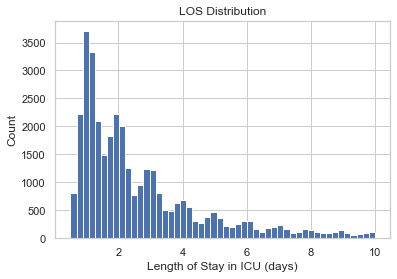

In [20]:
los = patients['los_icu']
plt.hist(los, bins=50)
plt.xlabel('Length of Stay in ICU (days)')
plt.ylabel('Count')
plt.title('LOS Distribution')
plt.show()

### LOS by Patient Outcome and Gender

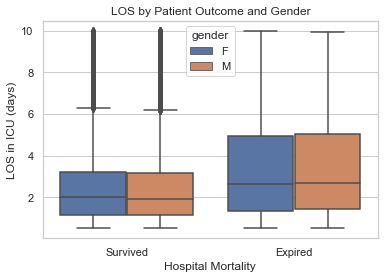

In [29]:
sns.boxplot(data=patients, x='mort_hosp', y='los_icu', hue='gender')
plt.title('LOS by Patient Outcome and Gender')
plt.xlabel('Hospital Mortality')
plt.xticks([0, 1], ['Survived', 'Expired'])
plt.ylabel('LOS in ICU (days)')
plt.show()

### Patient Outcome for each ICU Care Unit

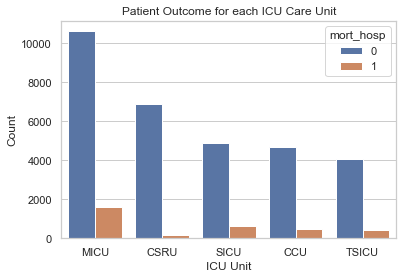

In [28]:
sns.countplot(data=patients, x='first_careunit', hue='mort_hosp', order=patients['first_careunit'].value_counts().index)
plt.title('Patient Outcome for each ICU Care Unit')
plt.xlabel('ICU Unit')
plt.ylabel('Count')
plt.show()

### Ethnicity Distribution by Gender

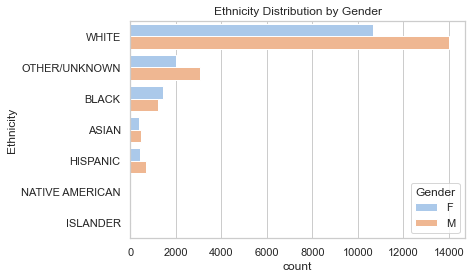

In [21]:
sns.countplot(data=patients, y='ethnicity', hue='gender', palette='pastel')

plt.title('Ethnicity Distribution by Gender')
plt.ylabel('Ethnicity')
plt.legend(title='Gender', loc='lower right')

plt.show()

<AxesSubplot:>

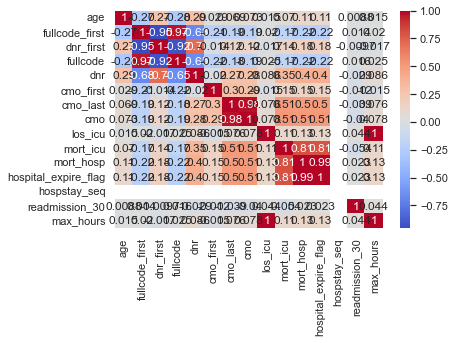

In [22]:
correlation_matrix = patients.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# 🧠 Insights & Observations

Note down any significant observations you've made from the above explorations.

# 📌 Conclusion

Summarize the findings of your EDA and the next steps you plan to take.

# 🔗 References

List down any references, sources, or inspirations you used during this EDA.